In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
glass = pd.read_csv('C:/Users/Akshay/Downloads/glass.csv')

In [3]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [5]:
glass.shape

(214, 10)

# Rounding RI into 2 decimals

In [6]:
round = np.round(glass['RI'],2)

In [7]:
round

0      1.52
1      1.52
2      1.52
3      1.52
4      1.52
       ... 
209    1.52
210    1.52
211    1.52
212    1.52
213    1.52
Name: RI, Length: 214, dtype: float64

In [8]:
round.unique()

array([1.52, 1.53, 1.51])

In [9]:
glass.insert(1,'Ri',round)

In [10]:
glass

,RI,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,1.52,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,1.52,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,1.52,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,1.52,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,1.52,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,1.52,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,1.52,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,1.52,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,1.52,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [11]:
glass.drop('RI' , axis =1 , inplace = True)

In [12]:
glass

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.52,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.52,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.52,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.52,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.52,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.52,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.52,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [13]:
glass.dtypes

Ri      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [14]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ri      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [15]:
#no null values in the dataset

In [16]:
glass.describe()

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.520047,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.002653,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.510000,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.520000,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.520000,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.520000,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.530000,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Data visualization

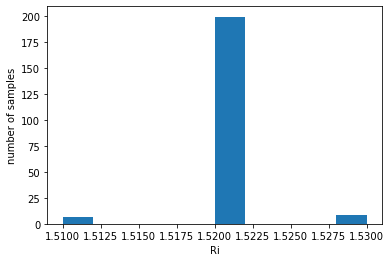

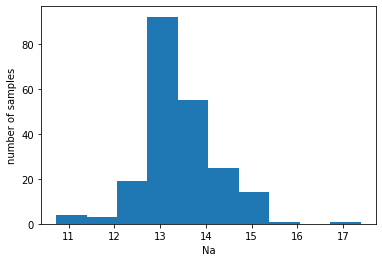

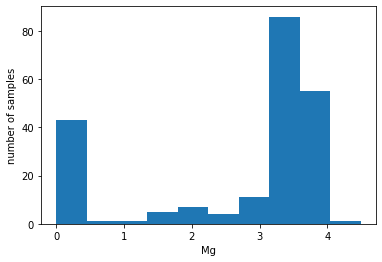

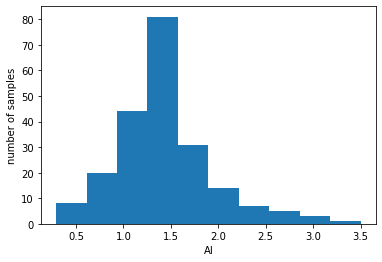

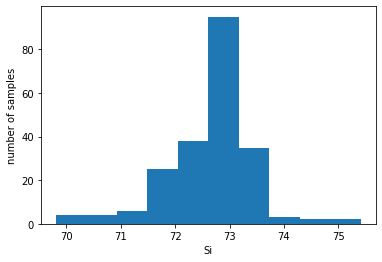

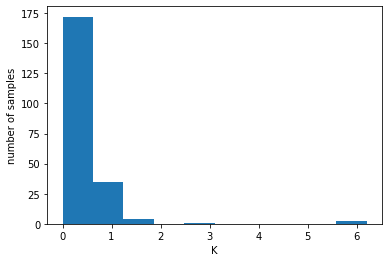

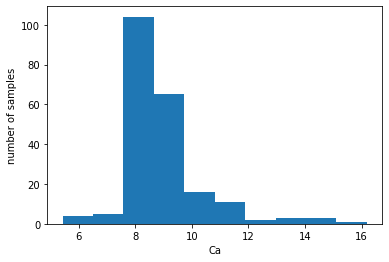

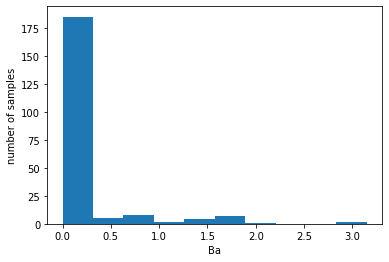

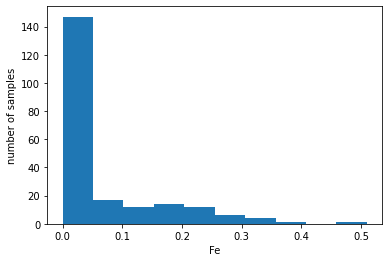

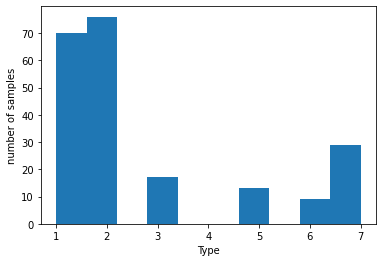

In [17]:
for i in glass.columns:
    plt.hist(glass[i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of samples')
    plt.show()

In [18]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

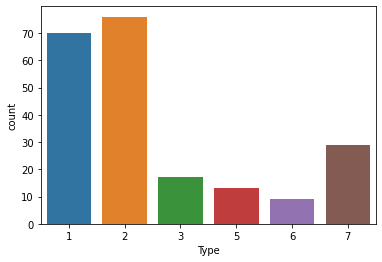

In [19]:
sns.countplot(x=glass.Type)

In [20]:
corr = glass.corr()
corr

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Ri,1.000000,-0.275788,-0.089974,-0.225928,-0.233037,-0.416372,0.627662,0.063520,0.064101,-0.166370
Na,-0.275788,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.089974,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.225928,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.233037,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.416372,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.627662,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.063520,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.064101,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.166370,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [21]:
glass[glass['Ri']>1.52]

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
47,1.53,13.99,3.70,0.71,71.57,0.02,9.82,0.00,0.10,1
103,1.53,13.80,3.15,0.66,70.57,0.08,11.64,0.00,0.00,2
106,1.53,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
107,1.53,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2
110,1.53,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2
111,1.53,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
112,1.53,12.64,0.00,0.67,72.02,0.06,14.40,0.00,0.00,2
131,1.53,13.70,0.00,1.36,71.24,0.19,13.44,0.00,0.10,2


In [22]:
glass[glass['Type'] == 1].head(20)

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.52,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.52,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.52,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.52,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.52,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.52,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.52,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.52,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.52,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [23]:
glass[glass['Type'] == 2].head(50)

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
70,1.52,14.86,3.67,1.74,71.87,0.16,7.36,0.00,0.12,2
71,1.52,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,2
72,1.52,13.09,3.59,1.52,73.10,0.67,7.83,0.00,0.00,2
73,1.52,13.34,3.57,1.57,72.87,0.61,7.89,0.00,0.00,2
74,1.52,13.02,3.56,1.54,73.11,0.72,7.90,0.00,0.00,2
75,1.52,13.02,3.58,1.51,73.12,0.69,7.96,0.00,0.00,2
76,1.52,13.44,3.61,1.54,72.39,0.66,8.03,0.00,0.00,2
77,1.52,13.00,3.58,1.54,72.83,0.61,8.04,0.00,0.00,2
78,1.52,13.92,3.52,1.25,72.88,0.37,7.94,0.00,0.14,2
79,1.52,12.82,3.52,1.90,72.86,0.69,7.97,0.00,0.00,2


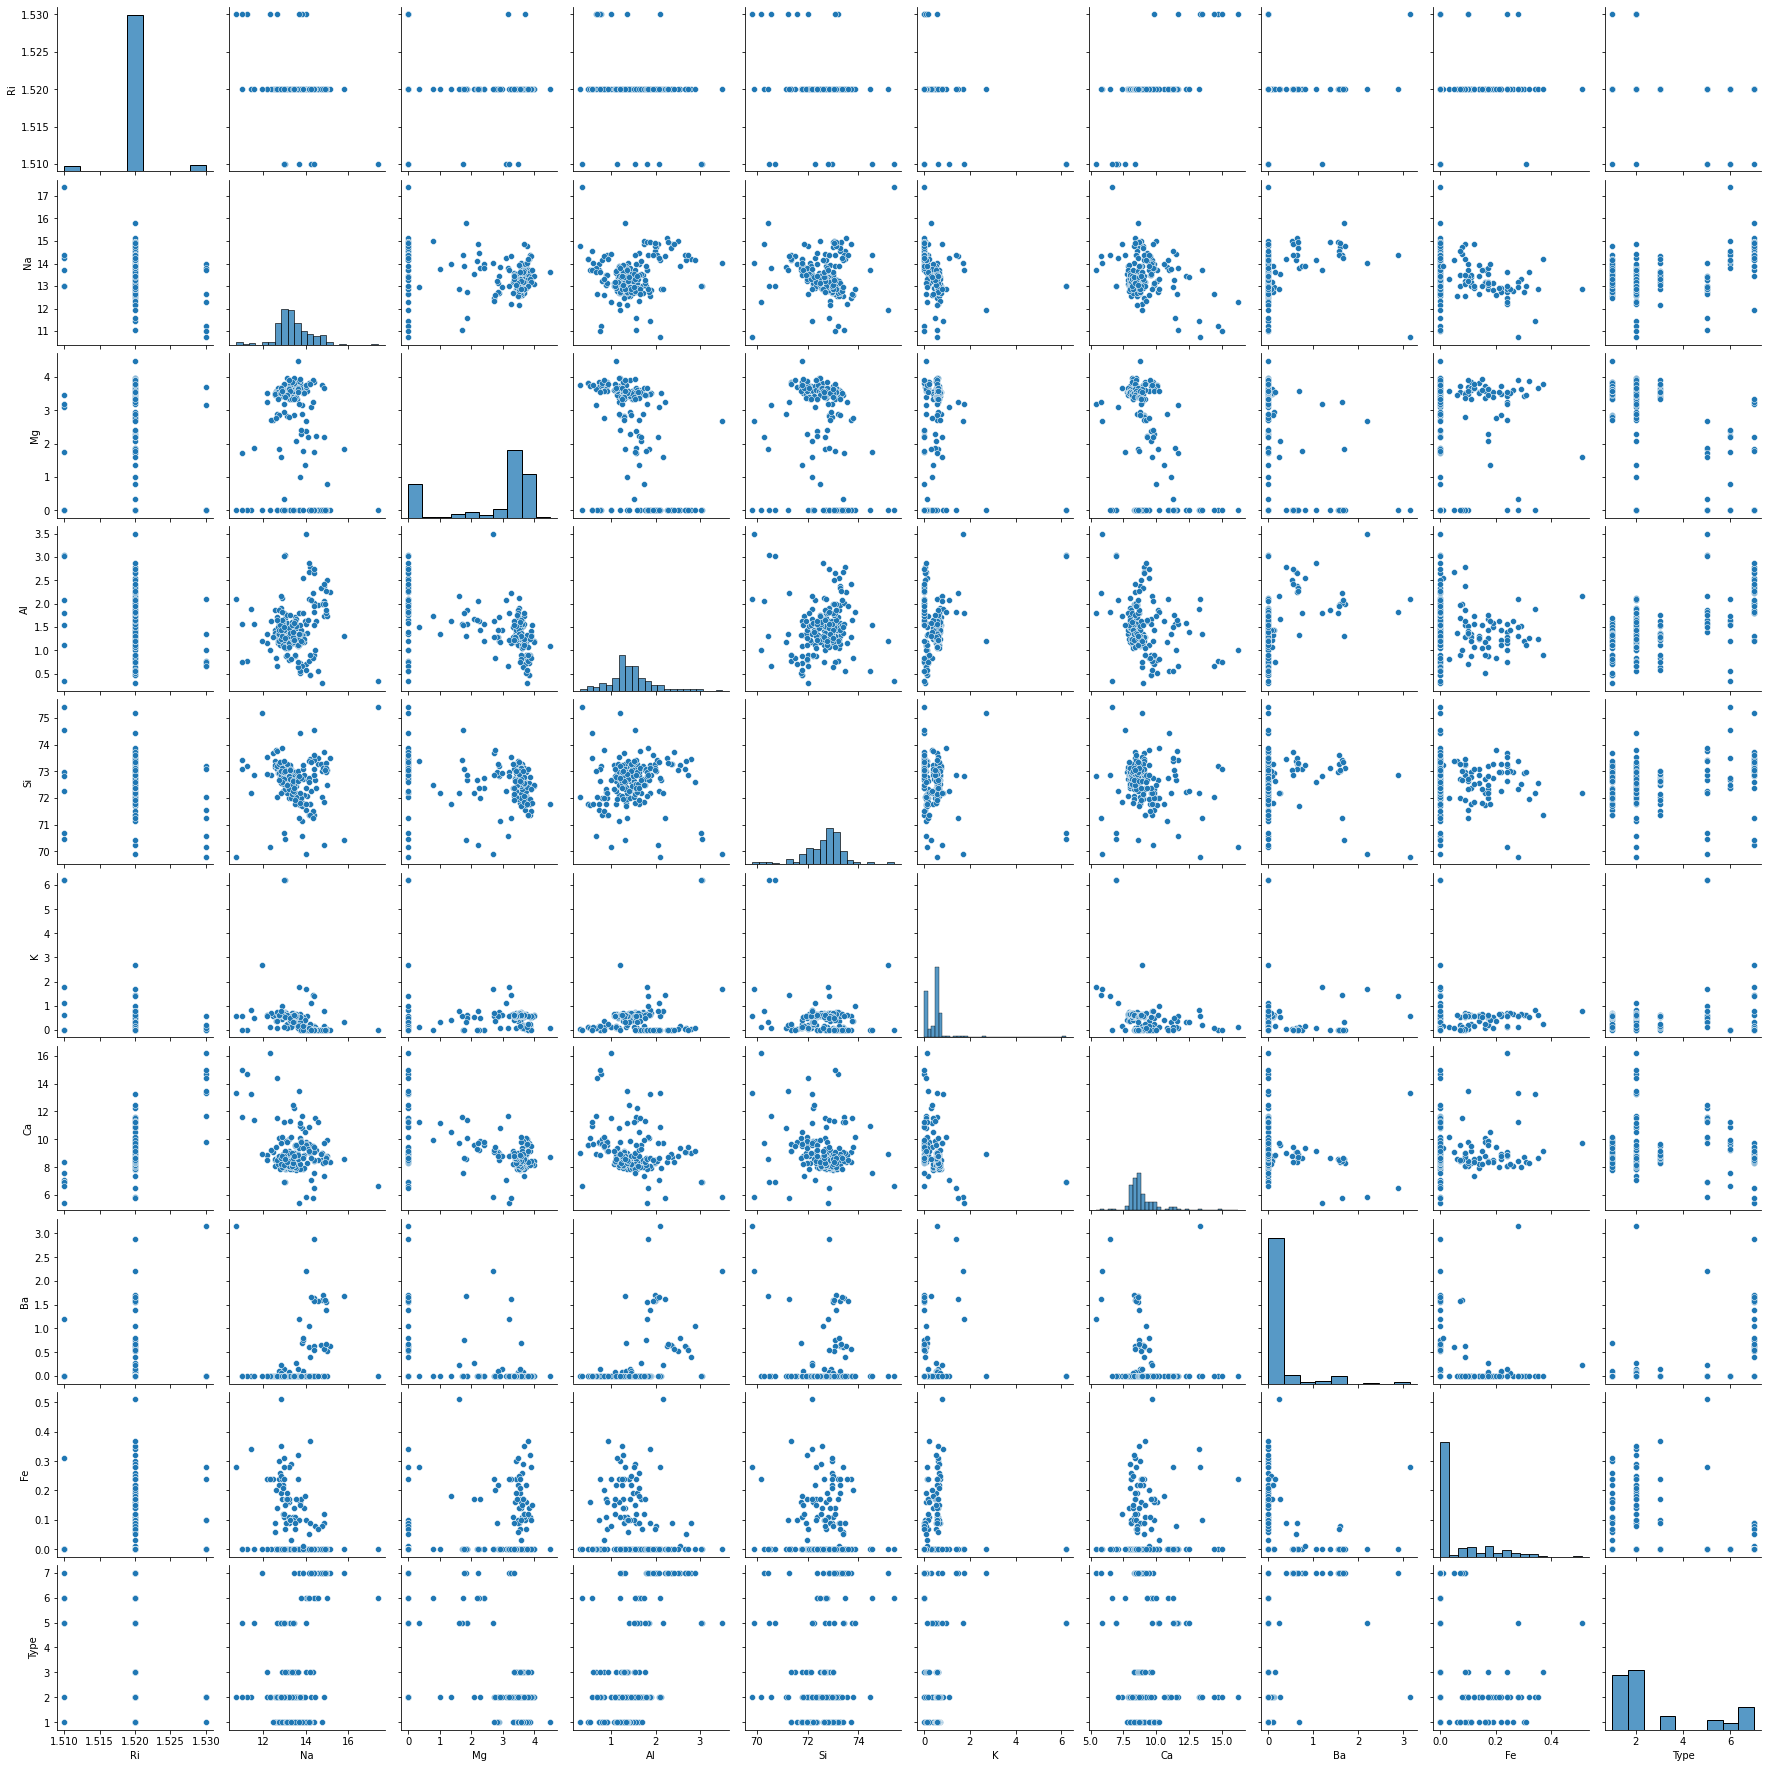

In [24]:
sns.pairplot(glass)

<AxesSubplot:>

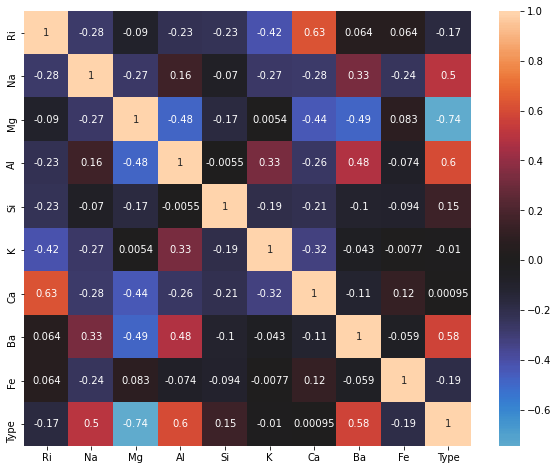

In [25]:
plt.subplots(figsize = (10,8))
sns.heatmap(glass.corr() , center = 0 , annot = True)

# defining dependant and independant variable

In [26]:
x = glass.drop('Type' , axis = 1)
x

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.52,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.52,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.52,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.52,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.52,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.52,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.52,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [27]:
y = glass['Type']
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

# splitting data into train and test

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8 , random_state = 42)

In [30]:
x_train.shape

(171, 9)

In [31]:
x_test.shape

(43, 9)

# finding best K value using elbow chart

In [32]:
accuracy_scores = []

k_range = range(3,100)

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn,x,y,cv=10)
    accuracy_scores.append(score.mean())

C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Akshay\anaconda3\lib\site-p

In [33]:
accuracy_scores

[0.6502164502164502,
 0.6454545454545455,
 0.6454545454545455,
 0.6411255411255412,
 0.6270562770562771,
 0.617965367965368,
 0.5948051948051949,
 0.6181818181818183,
 0.5898268398268398,
 0.6088744588744589,
 0.6090909090909091,
 0.6136363636363636,
 0.6041125541125542,
 0.6181818181818182,
 0.6183982683982685,
 0.6324675324675325,
 0.637012987012987,
 0.6324675324675325,
 0.6277056277056278,
 0.6419913419913421,
 0.6231601731601732,
 0.6324675324675325,
 0.6186147186147186,
 0.6324675324675325,
 0.6279220779220779,
 0.6324675324675325,
 0.6277056277056278,
 0.6277056277056278,
 0.6229437229437229,
 0.6136363636363636,
 0.6136363636363636,
 0.6088744588744589,
 0.6041125541125542,
 0.6041125541125542,
 0.6134199134199134,
 0.59004329004329,
 0.5993506493506493,
 0.5852813852813853,
 0.5805194805194804,
 0.5807359307359306,
 0.5945887445887446,
 0.59004329004329,
 0.59025974025974,
 0.5807359307359308,
 0.5759740259740259,
 0.5712121212121212,
 0.5714285714285714,
 0.5714285714285714,


In [34]:
len(accuracy_scores)

97

In [35]:
np.max(accuracy_scores)

0.6502164502164502

In [36]:
accuracy_scores.index(0.6502164502164502)

0

# plotting number of neighbors vs accuracy scores

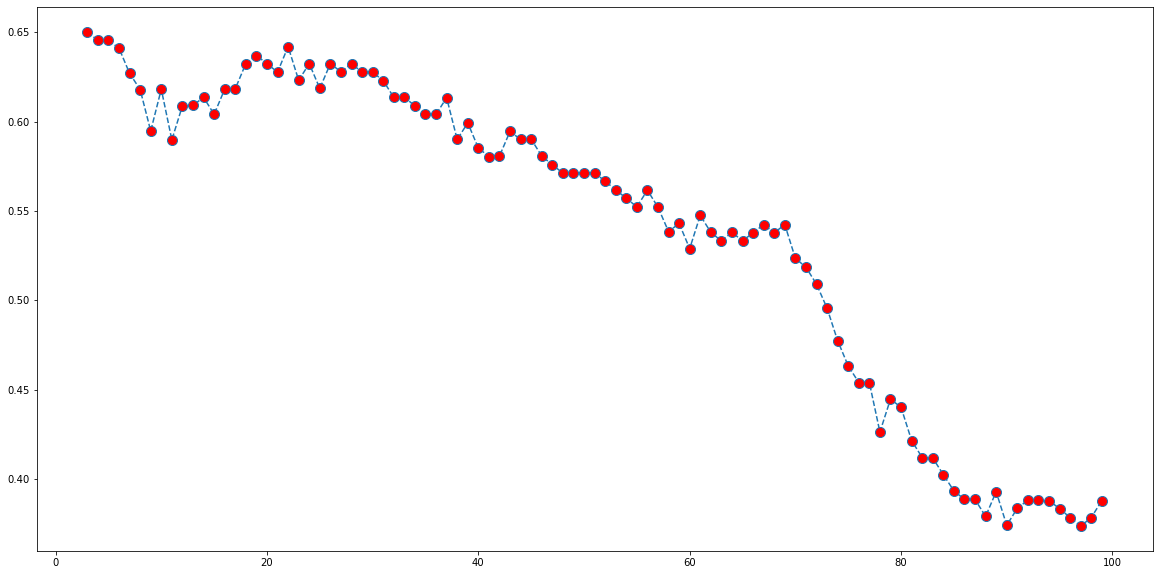

In [37]:
plt.figure(figsize = (20,10))
plt.plot(k_range , accuracy_scores , linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

# The best accuracy score is observed when number of neighbours are taken as 3

In [38]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [39]:
model = knn.fit(x_train,y_train)

In [40]:
model.predict(x_test)

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 2, 5, 1, 2, 6, 5, 6, 1, 3, 7, 2, 7,
       7, 7, 1, 1, 1, 1, 5, 1, 2, 2, 3, 2, 1, 7, 5, 3, 1, 2, 2, 7, 3],
      dtype=int64)

In [41]:
predicted = model.predict(x_test)

In [42]:
metrics.accuracy_score(y_test,predicted)

0.7441860465116279

In [43]:
predict = pd.DataFrame({'actual_vals' : y_test , 'predicted_vals' : predicted})

In [44]:
predict

,actual_vals,predicted_vals
9,1,1
197,7,7
66,1,1
191,7,7
117,2,2
111,2,2
15,1,1
86,2,2
75,2,2
144,2,1


# confusion matrix

In [45]:
matrix = confusion_matrix(y_test, predicted)
matrix

array([[ 8,  1,  2,  0,  0,  0],
       [ 4, 10,  0,  0,  0,  0],
       [ 1,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0],
       [ 0,  1,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  1,  7]], dtype=int64)

# plotting the confusion matrix

Text(69.0, 0.5, 'actual')

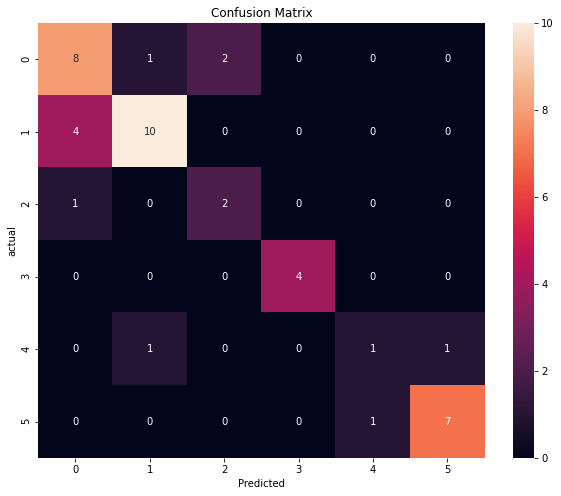

In [46]:
plt.subplots(figsize = (10,8))
sns.heatmap(matrix , annot = True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('actual')

In [47]:
print(classification_report(y_test , predicted))

              precision    recall  f1-score   support

           1       0.62      0.73      0.67        11
           2       0.83      0.71      0.77        14
           3       0.50      0.67      0.57         3
           5       1.00      1.00      1.00         4
           6       0.50      0.33      0.40         3
           7       0.88      0.88      0.88         8

    accuracy                           0.74        43
   macro avg       0.72      0.72      0.71        43
weighted avg       0.75      0.74      0.74        43



# model has an accuracy of 74% when number of neighbors are taken as 3
# 4 obs which actually belong to type 2 has been predicted as type1 , 2 observaions which actually belong to type 1 has been predicted as type 3
# The Amount of Magnesium and aluminium are one of the key components that determine which type the oservation is classified into
# The amount of calcium influences the RI of the glass
# most observations are classified into type 2 and second most as type 1